<CENTER><H1>Importing Libraries</H1><CENTER>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<CENTER><H1>Loading Dataset</H1></CENTER>

In [20]:
df=pd.read_csv(r"C:\Users\eruvu\Downloads\archive\hotel_bookings.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<CENTER><H1>Data Cleaning</H1></center>

In [22]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
df.shape

(119390, 32)

<h5>We won't use agent,country,meal,company,requered_car_parking columns in our analysis so we will drop it</h5>

In [24]:
df1=df.drop(["agent","country","meal","company","required_car_parking_spaces"],axis='columns')

In [25]:
df1.shape

(119390, 27)

In [26]:
df2=df1.dropna()

In [27]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

<h5>Removing Duplicates</h5> 

In [28]:
df2.duplicated().sum()

33998

In [29]:
df2= df2.drop_duplicates()

In [30]:
df2.duplicated().sum()

0

In [31]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,Check-Out,9/7/2017


<center><h1>Data Analysis</h1></center>

<h3>What type of hotel has high number of bookings?</h3>

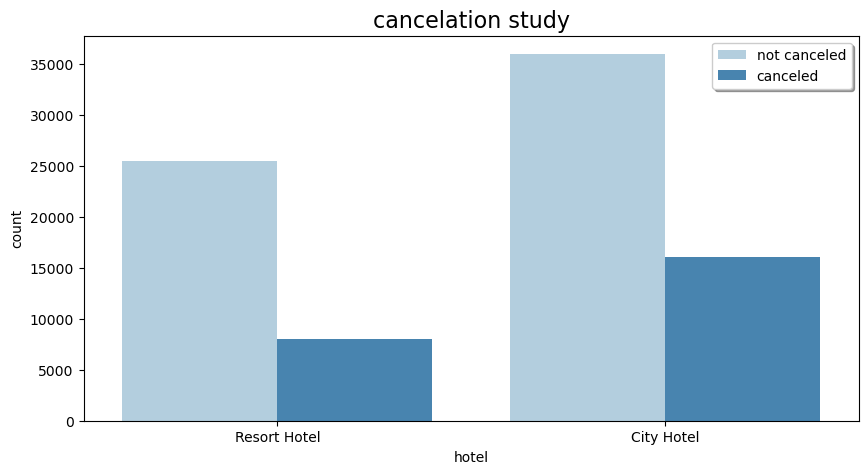

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x = 'hotel',hue='is_canceled',palette='Blues')
plt.title("cancelation study",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True)
plt.show()

<label>Here we can see that city hotels has more number bookings as well cancellations.</label><br><br>

<h3>What year had the greatest number of leads?</h3>

Text(0.5, 1.0, 'Arrival Year and Lead Time')

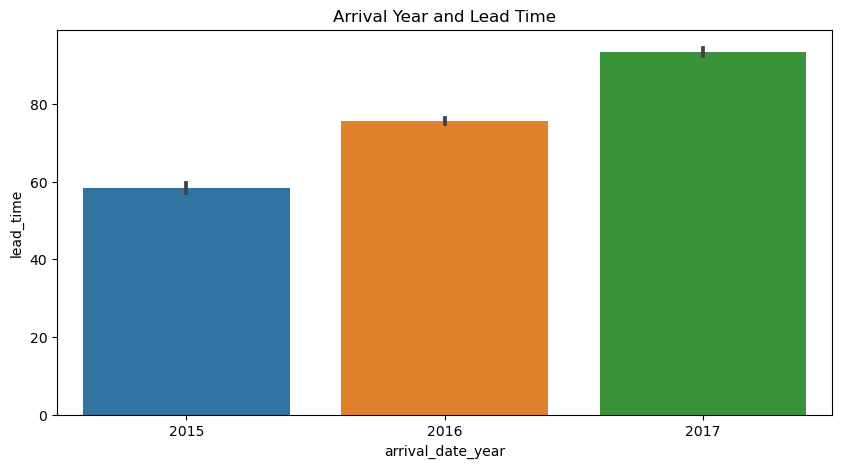

In [33]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'arrival_date_year',y = 'lead_time', data =df2).set_title('Arrival Year and Lead Time')

<label>Here we can see that 2017 has more number of leads.</label>

<h3>Is it possible to decrease cancellations by using a deposit function?</h3>

In [34]:
gp=df2.groupby("deposit_type").count()["is_canceled"]
gp=df2.groupby("deposit_type").count()
gp.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,84267,84267,84267,84267,84267,84267,84267,84267,84267,84267,...,84267,84267,84267,84267,84267,84267,84267,84267,84267,84267
Non Refund,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,...,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
Refundable,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88


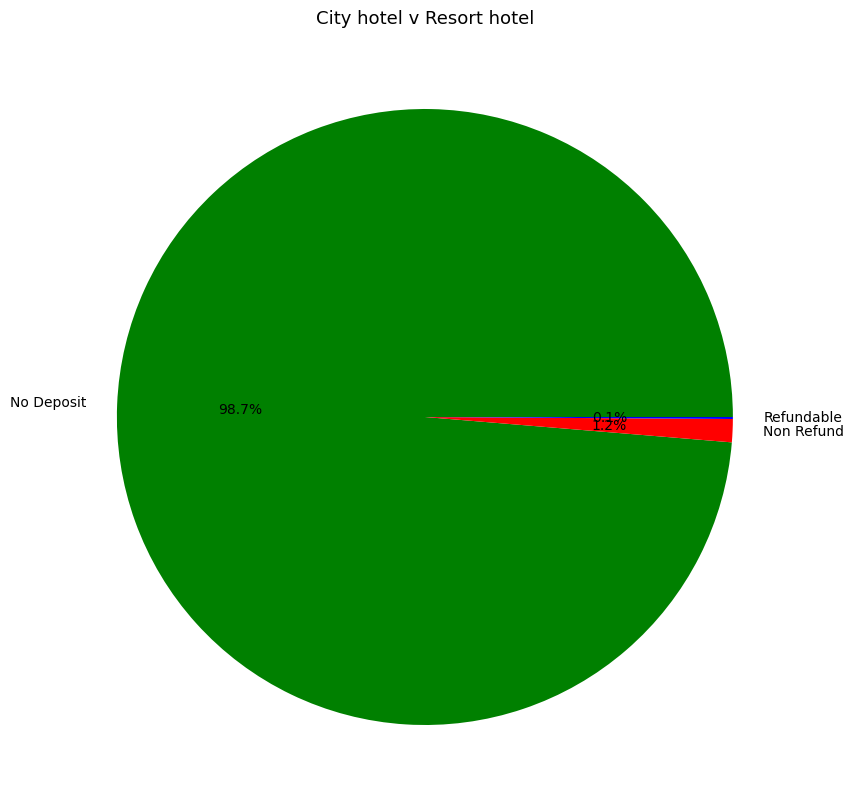

In [62]:
labels = df2["deposit_type"].value_counts().index          #index name
sizes = df2["deposit_type"].value_counts() 
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['GREEN','RED','BLUE'])
plt.title('City hotel v Resort hotel',color = 'black',fontsize = 13);

<label>We can see that 98% of the cancellations are happened due to No-Deposit Option</label>

<h3>Which market segment has the most number of cancellations?</h3?

<label>"Note:A market segment is a collection of clients with similar characteristics, such as price sensitivity, booking channel, travel purpose, booking lead time, geographic location, and length of stay."</label>

In [35]:
gp2=df2.groupby("market_segment").count()["is_canceled"]
print(gp2)

market_segment
Aviation           206
Complementary      696
Corporate         4053
Direct           11638
Groups            4404
Offline TA/TO    13339
Online TA        51052
Name: is_canceled, dtype: int64


In [64]:
gp2

market_segment
Aviation           206
Complementary      696
Corporate         4053
Direct           11638
Groups            4404
Offline TA/TO    13339
Online TA        51052
Name: is_canceled, dtype: int64

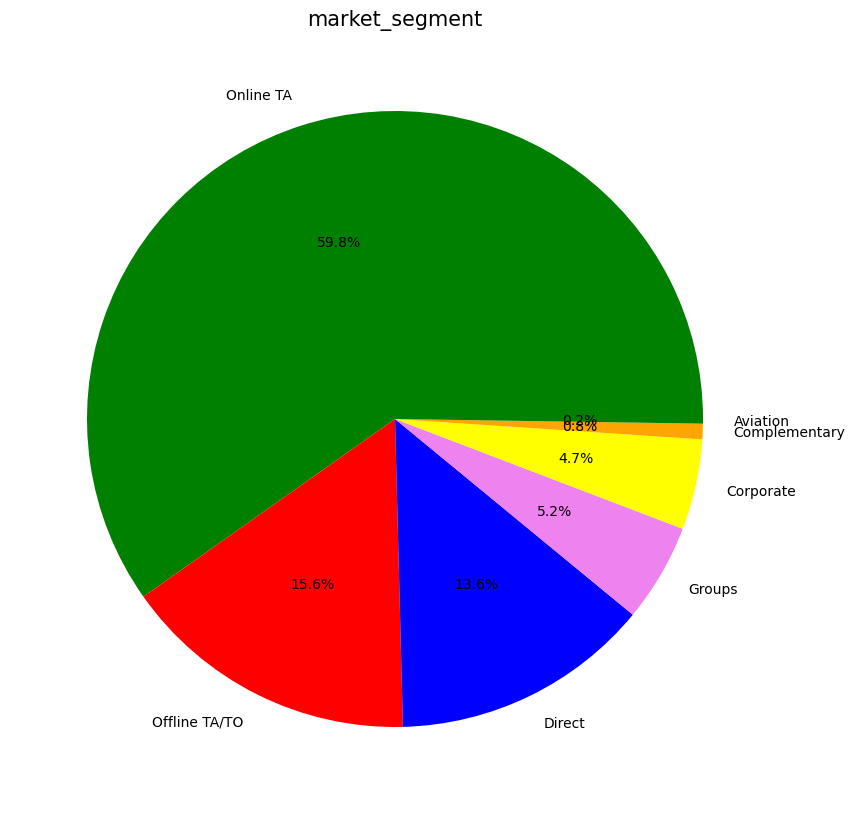

In [36]:
labels = df2["market_segment"].value_counts().index          #index name
sizes = df2["market_segment"].value_counts()                 
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['GREEN','RED','BLUE','VIOLET','YELLOW','ORANGE'])
plt.title('market_segment',color = 'black',fontsize = 15);

<label>We can see that most number of cancelllations are done via online mode</label>

<h3>Is there a connection between the cancellation and the channel of distribution?</h3>

In [37]:
gp2=df2.groupby("distribution_channel").count()["is_canceled"]
gp2

distribution_channel
Corporate     4781
Direct       12768
GDS            175
TA/TO        67663
Undefined        1
Name: is_canceled, dtype: int64

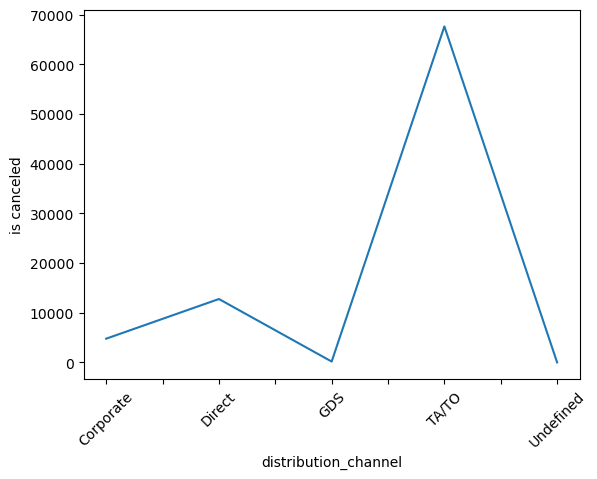

In [38]:
gp2.plot()
plt.xticks(rotation=45)
plt.ylabel("is canceled")
plt.show()

<label>When booking via TA/TO, cancellations are quite high; yet, when booking via GDS, cancellations are extremely low (GLOBAL DISTRIBUTION SYSTEM)</label>

<h3>Which month has the highest number of cancellations and reservations?</h3>

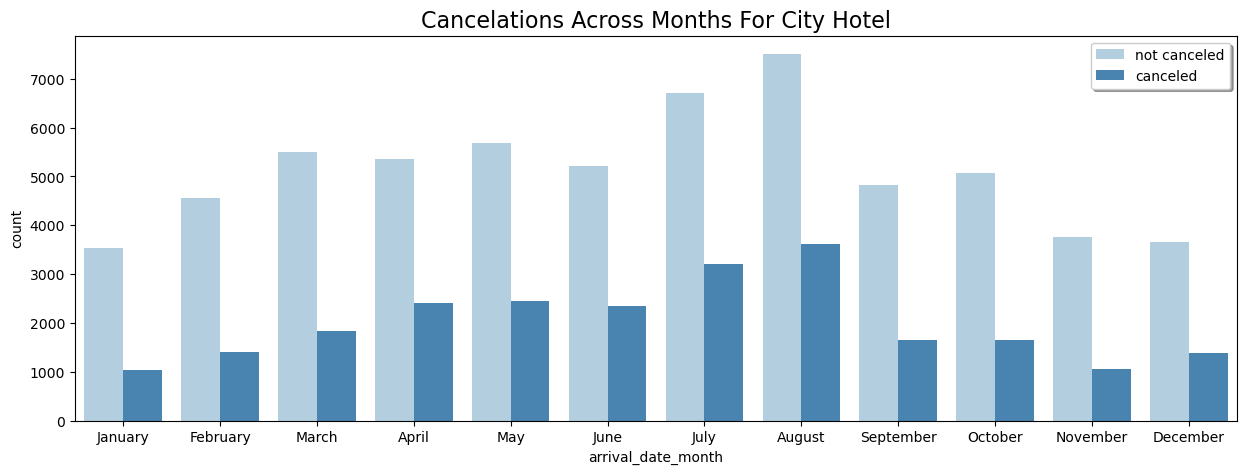

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(data=df2, x = 'arrival_date_month',hue='is_canceled',palette='Blues',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Cancelations Across Months For City Hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

<label>So the months July and Ausgust has more number of bookings as well as cancellations.</label>

In [40]:
dummies1=pd.get_dummies(df2.deposit_type)
dummies1

,No Deposit,Non Refund,Refundable
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
119385,1,0,0
119386,1,0,0
119387,1,0,0
119388,1,0,0


In [41]:
hb3=pd.concat([df2,dummies1.drop('Refundable',axis="columns")],axis="columns")
hb3=hb3.drop(["deposit_type"],axis='columns')
hb3.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,No Deposit,Non Refund
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,0,Transient,0.0,0,Check-Out,7/1/2015,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,0,Transient,0.0,0,Check-Out,7/1/2015,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,0,Transient,75.0,0,Check-Out,7/2/2015,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,0,Transient,75.0,0,Check-Out,7/2/2015,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,0,Transient,98.0,1,Check-Out,7/3/2015,1,0


In [42]:
hb4=hb3.drop(["arrival_date_month","customer_type","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","days_in_waiting_list","total_of_special_requests","reservation_status","reservation_status_date","arrival_date_year","market_segment","distribution_channel","reserved_room_type","assigned_room_type","hotel"],axis='columns')

In [43]:
hb4

,is_canceled,lead_time,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,No Deposit,Non Refund
0,0,342,0,0,0,0,3,0.00,1,0
1,0,737,0,0,0,0,4,0.00,1,0
2,0,7,0,0,0,0,0,75.00,1,0
3,0,13,0,0,0,0,0,75.00,1,0
4,0,14,0,0,0,0,0,98.00,1,0
...,...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,0,0,0,96.14,1,0
119386,0,102,0,0,0,0,0,225.43,1,0
119387,0,34,0,0,0,0,0,157.71,1,0
119388,0,109,0,0,0,0,0,104.40,1,0


In [44]:
hb4.shape

(85388, 10)

In [45]:
x=hb4.drop(["is_canceled"],axis="columns")

In [39]:
x.shape

(85388, 9)

In [46]:
y=hb4.is_canceled

In [47]:
y.shape

(85388,)

<h2>BUilding model to predict the cancellations</h2>

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

<h3>Linear Regression<h3>

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)


0.08135422639387657

<h3>Logistic Regression</h3>

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
model.score(x_test, y_test)

0.739255182105633

In [52]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<h3>Random Forest Classifier</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

In [53]:
model.score(x_test,y_test)

0.739255182105633

In [54]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)